In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from datetime import datetime
from collections import Counter

In [4]:
path = "train.csv"
df = pd.read_csv(path)
df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su


In [5]:
def findMiss(alist):
    miss = []
    for i,val in enumerate(alist):
        if val == True :
            miss.append(i)
    return miss

def finduniq(alist):
    count_distinct = Counter(alist)
    return count_distinct


In [6]:
datann = df
datann = pd.concat([df.drop(columns=['rain_sum (mm)']), df['rain_sum (mm)']], axis=1)

In [7]:
datann.dropna(subset=['rain_sum (mm)'], axis=0, inplace=True)
datann = datann.reset_index().drop(columns='index')

In [8]:
cols = datann.columns

In [9]:
avg_wind=datann[cols[11]].astype('float').mean(axis=0)
datann[cols[11]].replace(np.nan, avg_wind, inplace=True)

In [10]:
#check bad values for cols 1,2 and 3,4
bad = 0
for row in datann.index :
    if ((datann[cols[1]][row] < datann[cols[2]][row]) or (datann[cols[3]][row] < datann[cols[4]][row])):
        bad = bad+1

bad

0

In [11]:
datann[cols[0]] = datann[cols[0]].astype('string')

In [12]:
#encode date
yearis = []
monthis = []
dayis = []
for row in datann.index :
    yearis.append(int(datann[cols[0]][row].split('-')[0]))
    monthis.append(int(datann[cols[0]][row].split('-')[1]))
    dayis.append(int(datann[cols[0]][row].split('-')[2])) 

In [13]:
min(yearis),min(monthis),min(dayis)
mincount  = min(yearis)*365 + min(monthis)*30 + min(dayis)*1

daysince = []
for row in datann.index :
    dateval = yearis[row]*365 + monthis[row]*30 + dayis[row]*1
    datecount = dateval-mincount
    daysince.append(datecount)

ymdc = pd.DataFrame({'year': yearis, 'month': monthis, 'day': dayis, 'daysince' : daysince})

In [14]:
testdf = datann
testdf = pd.concat([testdf.drop(columns=[cols[0]]), ymdc],axis=1)

In [15]:
cols = testdf.columns
neworder = [cols[15],cols[16],cols[17],cols[18]]
for i,column in enumerate(cols) :
    if i<15 :
        neworder.append(column)

In [16]:
cols = testdf.columns
testdf = testdf[neworder]
testdf

,year,month,day,daysince,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city,rain_sum (mm)
0,2018,1,1,0,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,0.00,6.9,20.2,277.000000,3.61,0,su,7.7
1,2018,1,2,1,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,0.00,7.1,18.0,168.000000,4.11,0,su,9.4
2,2018,1,3,2,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,0.00,8.1,21.2,125.000000,4.23,0,su,7.8
3,2018,1,4,3,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,0.00,7.2,21.6,190.000000,4.22,0,su,29.7
4,2018,1,5,4,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,0.00,6.9,21.2,241.000000,4.16,0,su,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,2021,7,30,1304,6.8,5.0,3.0,1.1,1970-01-01T07:00,1970-01-01T07:00,8.14,0.00,16.1,25.6,54.000000,1.26,0,q,2.8
13194,2021,7,31,1305,6.0,3.7,2.9,0.7,1970-01-01T07:00,1970-01-01T07:00,9.30,0.00,16.1,21.2,352.000000,1.20,0,q,2.1
13195,2021,8,1,1305,4.3,3.7,1.5,0.7,1970-01-01T07:00,1970-01-01T07:00,15.36,0.00,9.7,15.5,335.000000,1.49,0,q,0.0
13196,2021,8,2,1306,5.7,3.0,2.3,0.2,1970-01-01T07:00,1970-01-01T07:00,18.56,0.00,11.5,15.8,166.380863,1.71,0,q,0.0


In [74]:
cols = testdf.columns
riseencode = []
setencode = []
validrise = []
validset = []

risehour = []
risemin = []
riseval = []
sethour = []
setmin = []
setval = []

for row in testdf.index :
    riseencode.append(datetime.fromisoformat(testdf[cols[8]][row]).strftime("%m:%d:%Y:%H:%M:%S"))
    setencode.append(datetime.fromisoformat(testdf[cols[9]][row]).strftime("%m:%d:%Y:%H:%M:%S"))
    validrise.append(True) if '01:01:1970' in riseencode[row] else validrise.append(False)
    validset.append(True) if '01:01:1970' in setencode[row] else validset.append(False)

    if validrise[row] == False :
        riseencode[row] = riseencode[row][-8:].split(':')
    else :
        riseencode[row] = '00:00:00'.split(':')

    if validset[row] == False :
        setencode[row] = setencode[row][-8:].split(':')
    else :
        setencode[row] = '00:00:00'.split(':')
    
    risehour.append(int(riseencode[row][0]))
    risemin.append(int(riseencode[row][1]))

    sethour.append(int(setencode[row][0]))
    setmin.append(int(setencode[row][1]))

    riseval.append(risehour[row]*60 + risemin[row])
    setval.append(sethour[row]*60 + setmin[row])

    

In [82]:
riseval[11887]

0

In [88]:
index_range = testdf.loc[testdf['city'] == 'q'].index
validnum = sum(map(lambda x: riseval[x] != 0, index_range))

avgrise = sum(riseval[min(index_range):max(index_range)])//validnum
avgset = sum(setval[min(index_range):max(index_range)])//validnum


In [89]:
avgrise,avgset
# datann[cols[11]].replace(np.nan, avg_wind, inplace=True)

(1048, 335)

In [90]:
for row in testdf.index :
    riseval[row] = avgrise if riseval[row] == 0 else riseval[row]
    setval[row] = avgset if setval[row] == 0 else setval[row]

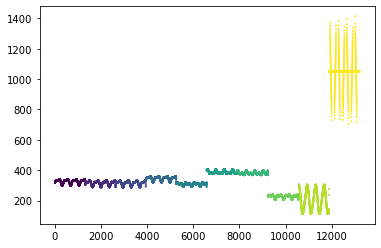

In [113]:
uniqcity = finduniq(testdf.city)
mapping = {}
for i,city in enumerate(uniqcity):
    mapping[city] = i
colorlist = list(map(mapping.get, testdf.city))
plt.scatter(testdf.index,riseval,c=colorlist,s=1)


In [50]:
len(testdf.index)

13198

In [114]:
minperday = 24*60
riseval = pd.Series(riseval)
setval = pd.Series(setval)

sinrise = np.sin(2*np.pi*riseval/minperday)
cosrise = np.cos(2*np.pi*riseval/minperday)
sinset = np.sin(2*np.pi*setval/minperday)
cosset = np.cos(2*np.pi*setval/minperday)

# df.drop('seconds', axis=1, inplace=True)

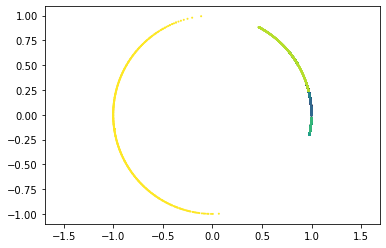

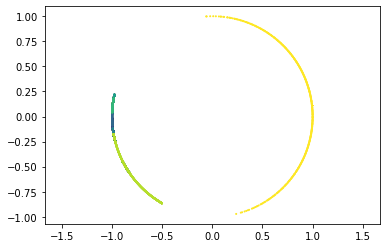

In [115]:
plt.scatter(sinrise,cosrise,c=colorlist,s=1)
plt.axis('equal')
plt.show()
plt.scatter(sinset,cosset,c=colorlist,s=1)
plt.axis('equal')
plt.show()

In [116]:
riseset = pd.DataFrame({'sinrise': sinrise, 'cosrise': cosrise, 'sinset': sinset, 'cosset': cosset })

In [137]:
newdata = testdf
newdata = pd.concat([newdata.drop(columns=[cols[8],cols[9]]), riseset],axis=1)
newdata = pd.get_dummies(newdata, columns=['city','year','month','day'])
newdata.describe()
newdata.to_csv('prerpocessed2.csv')